In [2]:
from PIL import Image
import numpy as np
import matplotlib.pyplot as plt

In [3]:
def laplacian_filter(channel, kernel):
    # Get the size of the channel
    width, height = channel.size
    
    # Create a new channel to hold the filtered image
    filtered_channel = Image.new('L', (width, height))
    
    # Apply the kernel to each pixel in the channel
    for x in range(1, width-1):
        for y in range(1, height-1):
            # Compute the filtered value for the current pixel
            filtered_value = 0
            for i in range(-1, 2):
                for j in range(-1, 2):
                    pixel_value = channel.getpixel((x+i, y+j))
                    filter_weight = kernel[i+1][j+1]
                    filtered_value += pixel_value * filter_weight
            # Set the filtered value for the current pixel in the new channel
            filtered_channel.putpixel((x, y), filtered_value)
    
    return filtered_channel

In [4]:
def main(image_path):
    # Load the image using the PIL library
    img = Image.open(image_path)
    
    # Separate the image into its red, green, and blue channels
    r, g, b = img.split()
    
    # Define the Laplacian filter kernel
    kernel = [[0, 1, 0],
              [1, -4, 1],
              [0, 1, 0]]
    
    # Apply the Laplacian filter to each channel separately
    r_lap = laplacian_filter(r, kernel)
    g_lap = laplacian_filter(g, kernel)
    b_lap = laplacian_filter(b, kernel)
    
    # Combine the filtered channels back into a colorful image
    filtered_img = Image.merge('RGB', (r_lap, g_lap, b_lap))
    
    return filtered_img

In [5]:
result = main("image.jpeg")

In [6]:
result1 = main("color.png")


In [7]:
result.save("rgb1.jpeg")

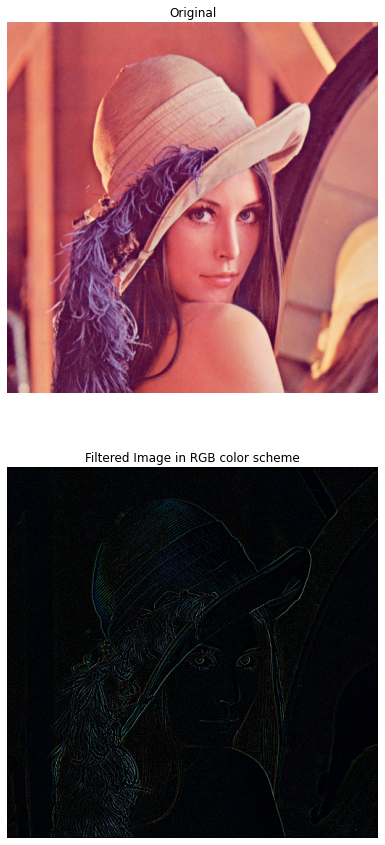

In [8]:
plt.figure(figsize=(20,15))
plt.subplot(2,1,1)
plt.imshow(Image.open("color.png"),cmap="gray")
plt.axis("off")
plt.title("Original")
plt.subplot(2,1,2)
plt.imshow(result1,cmap="gray")
plt.axis("off")
plt.title("Filtered Image in RGB color scheme")
plt.show()

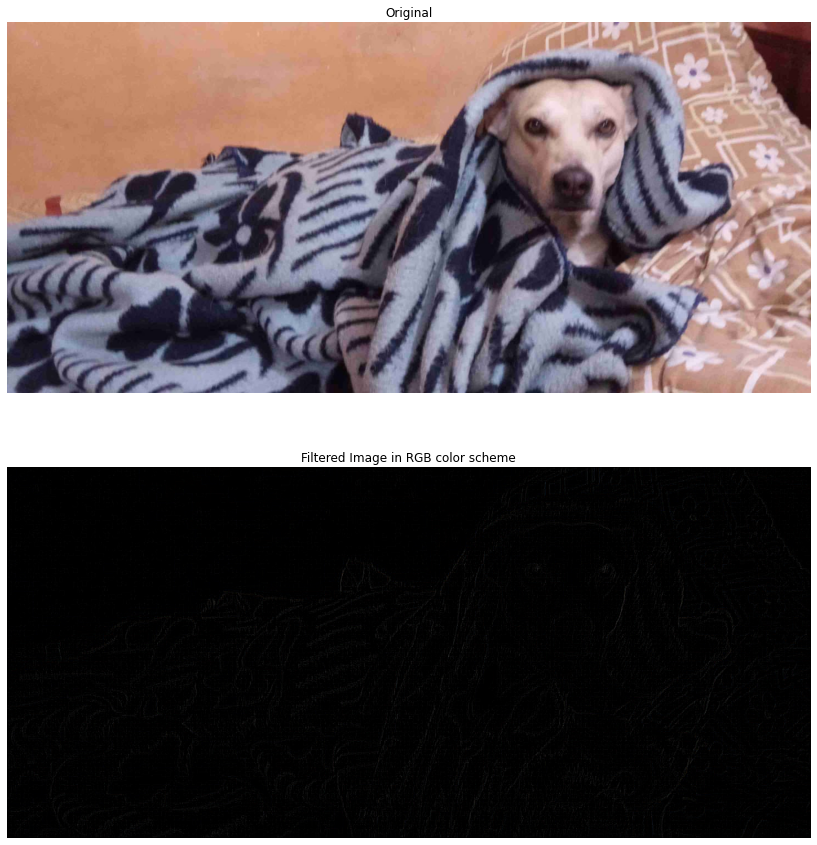

In [9]:
plt.figure(figsize=(20,15))
plt.subplot(2,1,1)
plt.imshow(Image.open("image.jpeg"),cmap="gray")
plt.axis("off")
plt.title("Original")
plt.subplot(2,1,2)
plt.imshow(result,cmap="gray")
plt.axis("off")
plt.title("Filtered Image in RGB color scheme")
plt.show()